# Week 3 discussion

In [33]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import warnings 
from ipywidgets import interact, fixed
from scipy.stats import skewnorm
import time, math, statistics, random, scipy

## Dataset: Papaya ripeness
 - Input: papaya number(no other info)
 - Output: Ripeness score (real number)
 - Objective:
   - Already seen: estimate this function of ripeness f using hypothesis h
   - Interpret what a loss value signifies
   - Gain more information about the dataset using the loss value

In [34]:
dataset = pd.read_csv('./papaya.csv')
print(dataset)

   Ripeness
0         3
1         9
2         6
3         6
4         5
5         9
6         3
7         6


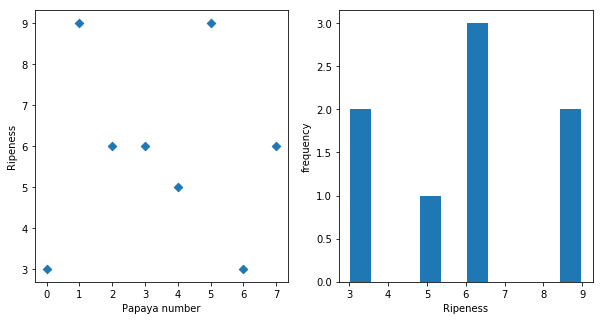

In [35]:
f, (p1, p2) = plt.subplots(1, 2)
f.set_figheight(5)
f.set_figwidth(10)
p1.scatter(np.arange(dataset.shape[0]), dataset['Ripeness'], marker='D')
p1.set(xlabel='Papaya number', ylabel='Ripeness')
p2.hist(dataset['Ripeness'], bins=None, rwidth=0.9)
p2.set(xlabel='Ripeness', ylabel='frequency');

### Number of incorrect predictions

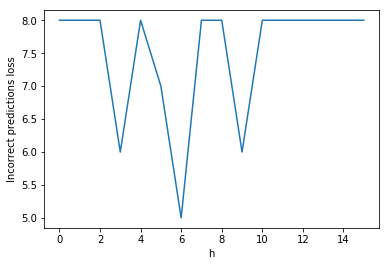

Min. number of incorrect predictions = min. loss = 5


In [36]:
plt.plot(np.arange(16), [dataset['Ripeness'].shape[0] - np.sum(dataset['Ripeness'] == i) for i in range(16)])
mode = np.argmax(np.bincount(dataset['Ripeness']))
#plt.axvline(mode, color='g', linestyle=':')
plt.xlabel("h")
plt.ylabel("Incorrect predictions loss")
plt.show()
print("Min. number of incorrect predictions = min. loss =", np.min(np.array([dataset['Ripeness'].shape[0] - np.sum(dataset['Ripeness'] == i) for i in range(16)])))

### What does this value tell us?
- Is it a good measure to find some information about the data?
- How does it relate to the spread/dispersion of data?

In [52]:
dataset_out = np.array(dataset['Ripeness'])
dataset_out -= np.array([-20, -10, 0, 0, 5, 10, 20, 0])
print(dataset_out)

[ 23  19   6   6   0  -1 -17   6]


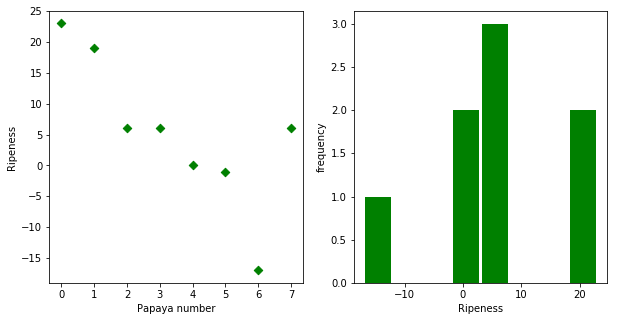

In [65]:
f, (p1, p2) = plt.subplots(1, 2)
f.set_figheight(5)
f.set_figwidth(10)
p1.scatter(np.arange(dataset_out.shape[0]), dataset_out, marker='D', color='g')
p1.set(xlabel='Papaya number', ylabel='Ripeness')
p2.hist(dataset_out, bins=dataset_out.shape[0], rwidth=0.9, color='g')
p2.set(xlabel='Ripeness', ylabel='frequency');

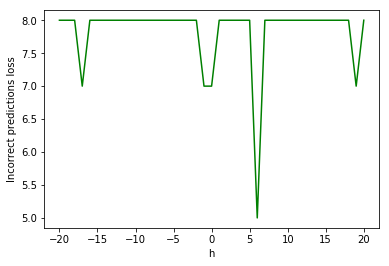

Min. number of incorrect predictions = min. loss = 5


In [69]:
plt.plot(range(-20, 21, 1), [dataset_out.shape[0] - np.sum(dataset_out == i) for i in range(-20, 21, 1)], color='g')
#mode = np.argmax(np.bincount(dataset_out))
#plt.axvline(mode, color='g', linestyle=':')
plt.xlabel("h")
plt.ylabel("Incorrect predictions loss")
plt.show()
print("Min. number of incorrect predictions = min. loss =", np.min(np.array([dataset_out.shape[0] - np.sum(dataset_out == i) for i in range(-50, 50, 1)])))

- Value of loss same
- Is the loss a good representative of the spread?
- Discuss

### Distance from furthest point

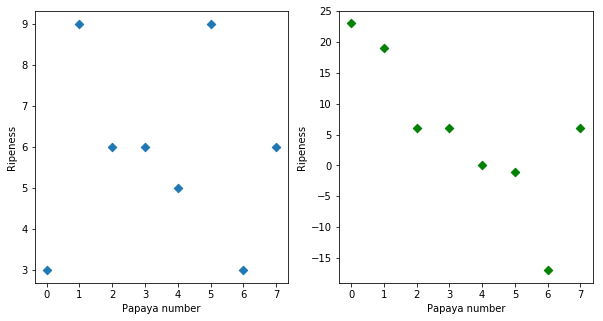

In [67]:
f, (p1, p2) = plt.subplots(1, 2)
f.set_figheight(5)
f.set_figwidth(10)
p1.scatter(np.arange(dataset.shape[0]), dataset['Ripeness'], marker='D')
p1.set(xlabel='Papaya number', ylabel='Ripeness')
p2.scatter(np.arange(dataset_out.shape[0]), dataset_out, marker='D', color='g')
p2.set(xlabel='Papaya number', ylabel='Ripeness');

Min loss dataset_1 = 3
Min loss dataset_2 = 20


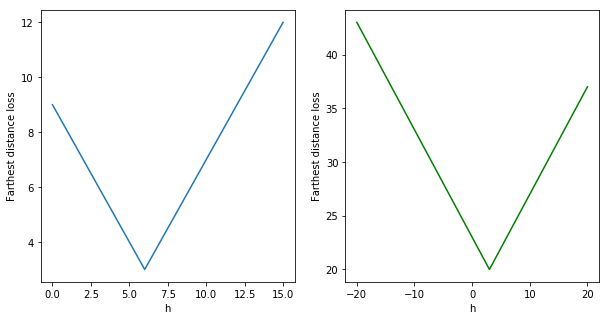

In [73]:
loss_arr = [np.max([np.abs(h - np.max(dataset['Ripeness'])), np.abs(h - np.min(dataset['Ripeness']))]) for h in range(0, 16, 1)]
midpoint = (np.max(dataset['Ripeness']) + np.min(dataset['Ripeness'])) / 2
f, (p1, p2) = plt.subplots(1, 2)
f.set_figheight(5)
f.set_figwidth(10)
p1.plot(np.arange(0, 16, 1), loss_arr)
p1.set(xlabel="h", ylabel="Farthest distance loss")
print("Min loss dataset_1 =", np.min(loss_arr))
loss_arr = [np.max([np.abs(h - np.max(dataset_out)), np.abs(h - np.min(dataset_out))]) for h in range(-20, 21, 1)]
midpoint = (np.max(dataset_out) + np.min(dataset_out)) / 2
print("Min loss dataset_2 =", np.min(loss_arr))
p2.plot(np.arange(-20, 21, 1), loss_arr, color='g')
p2.set(xlabel="h", ylabel="Farthest distance loss");

- Different loss values
- What information does this loss provide about the dataset?
- Is this a better measure of spread/dispersion?

In [80]:
dataset_end = np.array(dataset['Ripeness'])
dataset_end -= np.array([-20, -10, -15, 20, 20, 25, 20, -15])
print(dataset_end)

[ 23  19  21 -14 -15 -16 -17  21]


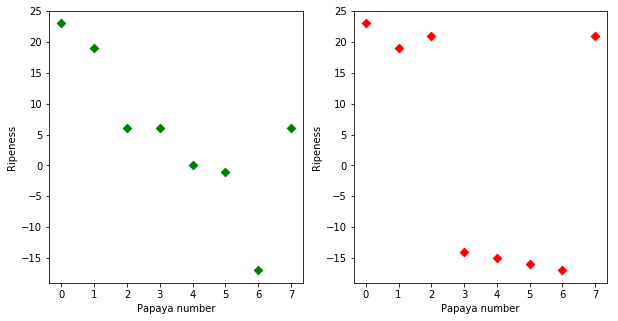

In [81]:
f, (p1, p2) = plt.subplots(1, 2)
f.set_figheight(5)
f.set_figwidth(10)
p1.scatter(np.arange(dataset.shape[0]), dataset_out, marker='D', color='g')
p1.set(xlabel='Papaya number', ylabel='Ripeness')
p2.scatter(np.arange(dataset_out.shape[0]), dataset_end, marker='D', color='r')
p2.set(xlabel='Papaya number', ylabel='Ripeness');

Farthest distance loss dataset_2 = 20
Farthest distance loss dataset_3 = 20


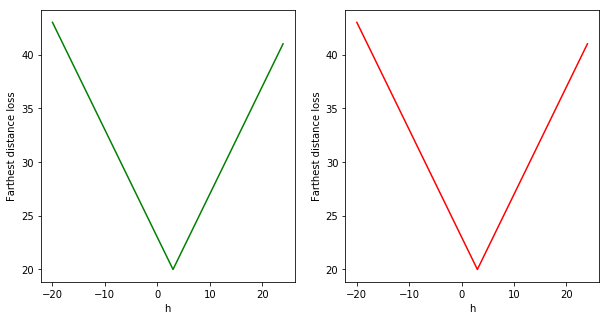

In [87]:
loss_arr = [np.max([np.abs(h - np.max(dataset_out)), np.abs(h - np.min(dataset_out))]) for h in range(-20, 25, 1)]
midpoint = (np.max(dataset_out) + np.min(dataset_out)) / 2
f, (p1, p2) = plt.subplots(1, 2)
f.set_figheight(5)
f.set_figwidth(10)
p1.plot(np.arange(-20, 25, 1), loss_arr, color='g')
p1.set(xlabel="h", ylabel="Farthest distance loss")
print("Farthest distance loss dataset_2 =", np.min(loss_arr))
loss_arr = [np.max([np.abs(h - np.max(dataset_end)), np.abs(h - np.min(dataset_end))]) for h in range(-20, 25, 1)]
midpoint = (np.max(dataset_end) + np.min(dataset_end)) / 2
print("Farthest distance loss dataset_3 =", np.min(loss_arr))
p2.plot(np.arange(-20, 25, 1), loss_arr, color='r')
p2.set(xlabel="h", ylabel="Farthest distance loss");

- Same values of loss
- How well does this loss model the spread of data?

### Mean absolute deviation

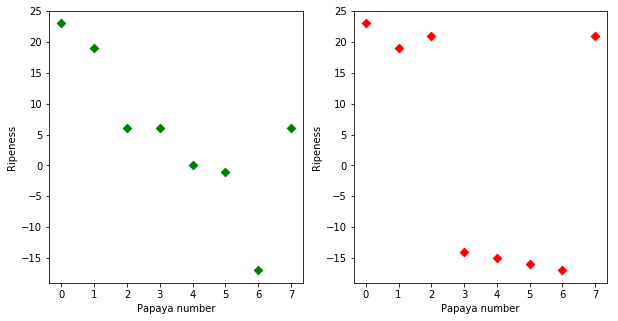

In [84]:
f, (p1, p2) = plt.subplots(1, 2)
f.set_figheight(5)
f.set_figwidth(10)
p1.scatter(np.arange(dataset.shape[0]), dataset_out, marker='D', color='g')
p1.set(xlabel='Papaya number', ylabel='Ripeness')
p2.scatter(np.arange(dataset_out.shape[0]), dataset_end, marker='D', color='r')
p2.set(xlabel='Papaya number', ylabel='Ripeness');

Mean absolute deviation dataset_2 = 66
Mean absolute deviation loss dataset_3 = 146


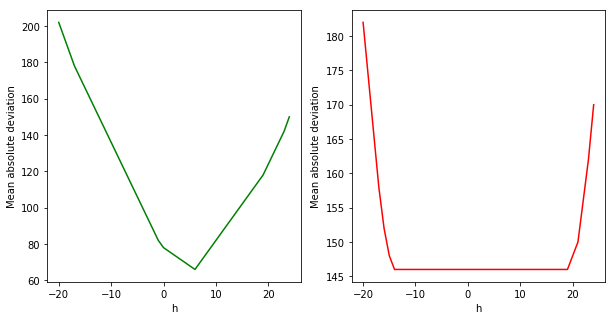

In [99]:
midpoint = (np.max(dataset_out) + np.min(dataset_out)) / 2
loss_arr = [np.sum(np.array([np.abs(h - yi) for yi in dataset_out])) for h in range(-20, 25, 1)]
f, (p1, p2) = plt.subplots(1, 2)
f.set_figheight(5)
f.set_figwidth(10)
p1.plot(np.arange(-20, 25, 1), loss_arr, color='g')
p1.set(xlabel="h", ylabel="Mean absolute deviation")
print("Mean absolute deviation dataset_2 =", np.min(loss_arr))
midpoint = (np.max(dataset_end) + np.min(dataset_end)) / 2
loss_arr = [np.sum(np.array([np.abs(h - yi) for yi in dataset_end])) for h in range(-20, 25, 1)]
print("Mean absolute deviation loss dataset_3 =", np.min(loss_arr))
p2.plot(np.arange(-20, 25, 1), loss_arr, color='r')
p2.set(xlabel="h", ylabel="Mean absolute deviation");

- Is this loss better than the last one? 
- How can we make this better?

#### Another variation:

Mean squared deviation dataset_2 = 1068
Mean squared deviation loss dataset_3 = 2678


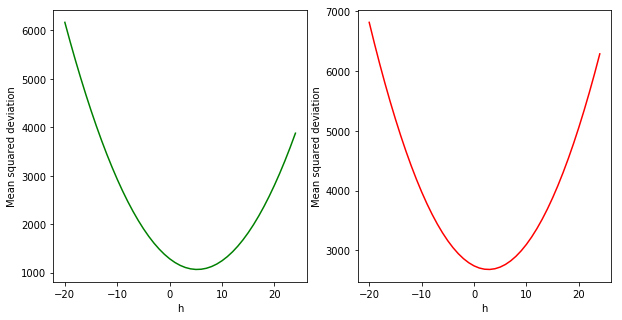

In [100]:
loss_arr = [np.sum(np.array([(h - yi) ** 2 for yi in dataset_out])) for h in range(-20, 25, 1)]
f, (p1, p2) = plt.subplots(1, 2)
f.set_figheight(5)
f.set_figwidth(10)
p1.plot(np.arange(-20, 25, 1), loss_arr, color='g')
p1.set(xlabel="h", ylabel="Mean squared deviation")
print("Mean squared deviation dataset_2 =", np.min(loss_arr))
loss_arr = [np.sum(np.array([(h - yi) ** 2 for yi in dataset_end])) for h in range(-20, 25, 1)]
print("Mean squared deviation loss dataset_3 =", np.min(loss_arr))
p2.plot(np.arange(-20, 25, 1), loss_arr, color='r')
p2.set(xlabel="h", ylabel="Mean squared deviation");